# I. Dùng sklearn.datasets.make_classification để tạo dữ liệu

c:\Users\NGOVANUC\.conda\envs\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


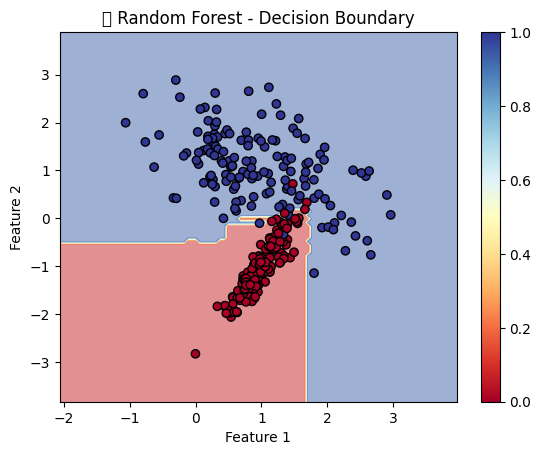

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

# Tạo dữ liệu 2 chiều đơn giản
X, y = make_classification(n_samples=300, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Huấn luyện Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)

# 1. Vẽ ranh giới phân loại
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", alpha=0.5, cmap=plt.cm.RdYlBu)

# 2. Vẽ dữ liệu thật
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="k")
plt.title("🌲 Random Forest - Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter)
plt.show()


# II. Xem feature importance

     Feature  Importance
0  Feature 1    0.267815
1  Feature 2    0.732185


c:\Users\NGOVANUC\.conda\envs\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


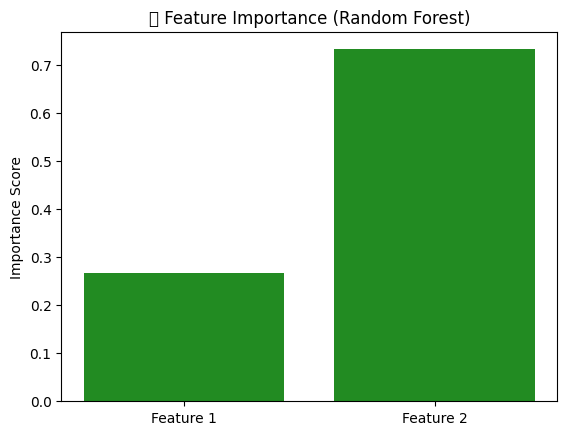

In [2]:
import pandas as pd

importances = model.feature_importances_
features = [f'Feature {i+1}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(importance_df)

# Hoặc vẽ biểu đồ
plt.bar(features, importances, color='forestgreen')
plt.title("🔥 Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


- Biểu đồ 1: Ranh giới phân loại giữa 2 lớp được vẽ rõ ràng (sắc nét hơn so với Logistic Regression)
- Biểu đồ 2: Tầm quan trọng của từng đặc trưng – dễ thấy đặc trưng nào là then chốt